# Notes on Chapter 9 of *Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow* by Aurélien Géron

In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2023-03-10 02:17:59.770002: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-10 02:17:59.937802: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-10 02:18:00.546697: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-03-10 02:18:00.546765: W tensorflow/

In [2]:
tf.__version__

'2.11.0'

In [3]:
keras.__version__

'2.11.0'

In [4]:
tf.config.list_physical_devices()

2023-03-10 02:18:01.873685: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 02:18:01.946380: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 02:18:01.946516: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

Load the fashion MNIST dataset, rescaling image intensities from 0-255 to 0-1.

In [5]:
(X_train_raw, y_train_raw), (X_test_raw, y_test) = keras.datasets.fashion_mnist.load_data()
X_test_raw = X_test_raw/255
X_train, X_valid, y_train, y_valid = train_test_split(X_train_raw/255, y_train_raw, test_size=5000, random_state=42) 

In [6]:
# from https://github.com/zalandoresearch/fashion-mnist
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

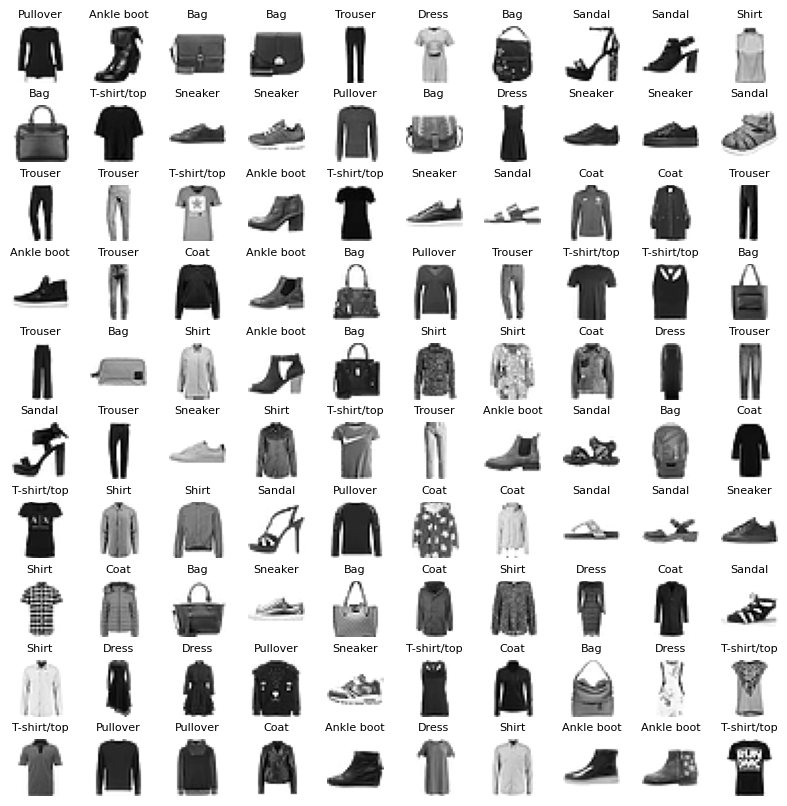

In [7]:
fig, axs = plt.subplots(10, 10, figsize=(10,10))
plt.subplots_adjust(hspace=0.4)

for i in range(10):
    for j in range(10):
        k = i + 10*j
        axs[i,j].imshow(X_train[k], cmap="binary")
        axs[i,j].axis('off')
        axs[i,j].set_title(class_names[y_train[k]], fontsize=8)

In [8]:
tf.keras.utils.set_random_seed(42)

In [9]:
m = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax"),
])

2023-03-10 02:18:04.954367: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 02:18:04.954600: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 02:18:04.954677: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 02:18:05.573283: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-03-10 02:18:05.573439: I tensorflow/compiler/xla/stream_executo

In [10]:
m.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [11]:
weights, biases = m.layers[3].get_weights()
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [12]:
m.compile(loss="sparse_categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])

One option is to pass a validation dataset to the fit function...

In [13]:
fithist = m.fit(X_train, y_train, epochs=20, validation_data=[X_valid, y_valid], batch_size=512)

Epoch 1/20


2023-03-10 02:18:07.187948: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


108/108 [==============================] - 2s 3ms/step - loss: 0.6268 - accuracy: 0.7863 - val_loss: 0.4467 - val_accuracy: 0.8416
Epoch 2/20
108/108 [==============================] - 0s 2ms/step - loss: 0.4080 - accuracy: 0.8569 - val_loss: 0.4113 - val_accuracy: 0.8536
Epoch 3/20
108/108 [==============================] - 0s 2ms/step - loss: 0.3659 - accuracy: 0.8714 - val_loss: 0.3650 - val_accuracy: 0.8686
Epoch 4/20
108/108 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.8784 - val_loss: 0.3648 - val_accuracy: 0.8698
Epoch 5/20
108/108 [==============================] - 0s 2ms/step - loss: 0.3177 - accuracy: 0.8865 - val_loss: 0.3449 - val_accuracy: 0.8754
Epoch 6/20
108/108 [==============================] - 0s 2ms/step - loss: 0.2982 - accuracy: 0.8931 - val_loss: 0.3328 - val_accuracy: 0.8804
Epoch 7/20
108/108 [==============================] - 0s 2ms/step - loss: 0.2815 - accuracy: 0.8977 - val_loss: 0.3385 - val_accuracy: 0.8772
Epoch 8/20
108/10

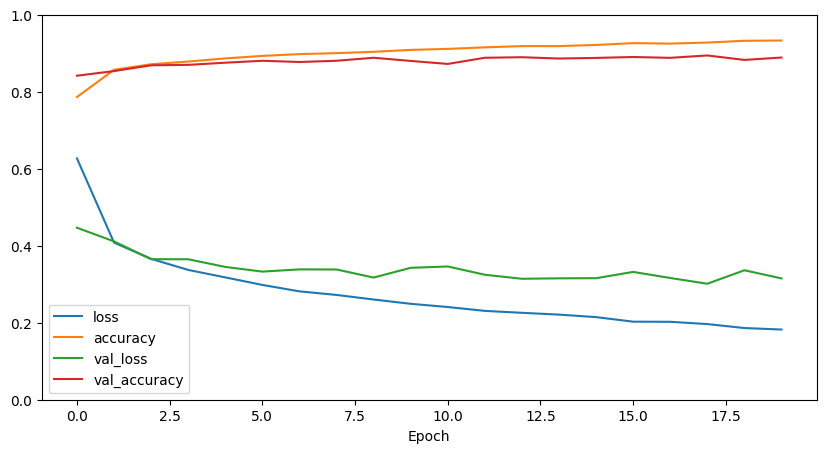

In [14]:
pd.DataFrame(fithist.history).plot(figsize=(10,5))
plt.ylim((0,1))
plt.xlabel("Epoch");

Another option is to pass a validation_split fraction rather than a validation dataset

In [15]:
m.fit(X_train, y_train, epochs=2, validation_split=0.1, batch_size=512)

Epoch 1/2
97/97 [==============================] - 0s 2ms/step - loss: 0.1755 - accuracy: 0.9356 - val_loss: 0.1802 - val_accuracy: 0.9325
Epoch 2/2
97/97 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9352 - val_loss: 0.1875 - val_accuracy: 0.9302


In [16]:
fithist.params

{'verbose': 1, 'epochs': 20, 'steps': 108}

In [17]:
fithist.epoch[-10:]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [18]:
m.predict(X_valid[:1])

1/1 [==============================] - 0s 46ms/step


array([[3.7686503e-12, 1.2553778e-14, 4.3113839e-13, 2.2912080e-14,
        5.6942654e-12, 2.0320024e-13, 6.5600152e-15, 2.0066270e-11,
        1.0000000e+00, 1.7526704e-14]], dtype=float32)

Load the California housing dataset

In [19]:
X_raw, y = sklearn.datasets.fetch_california_housing(return_X_y=True)
X_raw_train, X_raw_test, y_train, y_test = train_test_split(X_raw, y, train_size=0.9)

s = StandardScaler()
s.fit(X_raw_train)
X_train = s.transform(X_raw_train)
X_test = s.transform(X_raw_test)

In [20]:
m = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1),
])
m.compile(loss="mean_squared_error", optimizer="Adam")
hist = m.fit(X_train, y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
print(f"MSE: {m.evaluate(X_test, y_test):.3f}")

65/65 [==============================] - 0s 617us/step - loss: 0.3112
MSE: 0.311


<Axes: >

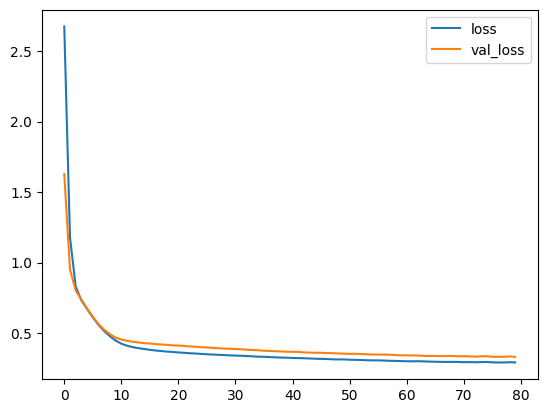

In [21]:
pd.DataFrame(hist.history).plot()

### Saving and loading models

In [22]:
m.save("handson-ml-09-model-1.h5")

In [23]:
m2 = keras.models.load_model("handson-ml-09-model-1.h5")
print(f"MSE: {m2.evaluate(X_test, y_test):.3f}")

65/65 [==============================] - 0s 682us/step - loss: 0.3112
MSE: 0.311


# Wide and deep network example (with functional syntax)

65/65 [==============================] - 0s 609us/step - loss: 0.3153
MSE: 0.315


<Axes: >

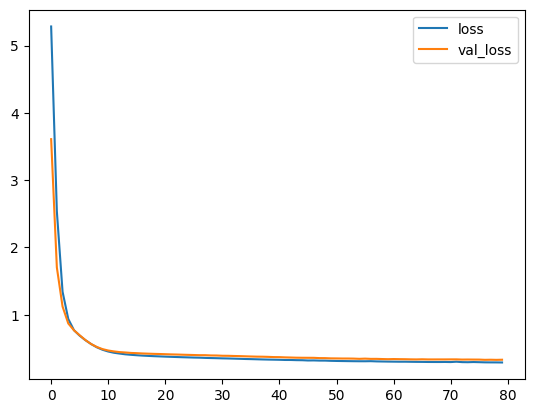

In [24]:
inputs = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation='relu', name="hidden1")(inputs)
hidden2 = keras.layers.Dense(30, activation='relu', name="hidden2")(hidden1)
concat = keras.layers.Concatenate()([inputs, hidden2])
outputs = keras.layers.Dense(1)(concat)
m = keras.Model(inputs=[inputs], outputs=[outputs])

m.compile(loss="mean_squared_error", optimizer="Adam")
hist = m.fit(X_train, y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
print(f"MSE: {m.evaluate(X_test, y_test):.3f}")
pd.DataFrame(hist.history).plot()

In [25]:
m.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 hidden2 (Dense)                (None, 30)           930         ['hidden1[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'hidden2[0][0]']            

### Example of multiple inputs:

In [26]:
X_train_A = X_train[:, :5]
X_train_B = X_train[:, 5:]
X_test_A = X_test[:, :5]
X_test_B = X_test[:, 5:]

In [27]:
input_A = keras.layers.Input(shape=X_train_A.shape[1:], name="inputA")
input_B = keras.layers.Input(shape=X_train_B.shape[1:], name="inputB")
hidden1 = keras.layers.Dense(30, activation='relu', name="hidden1")(input_B)
hidden2 = keras.layers.Dense(30, activation='relu', name="hidden2")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
outputs = keras.layers.Dense(1)(concat)
m = keras.Model(inputs=[input_A, input_B], outputs=[outputs])
m.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputB (InputLayer)            [(None, 3)]          0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           120         ['inputB[0][0]']                 
                                                                                                  
 inputA (InputLayer)            [(None, 5)]          0           []                               
                                                                                                  
 hidden2 (Dense)                (None, 30)           930         ['hidden1[0][0]']                
                                                                                            

65/65 [==============================] - 0s 638us/step - loss: 0.3763
MSE: 0.376


<Axes: >

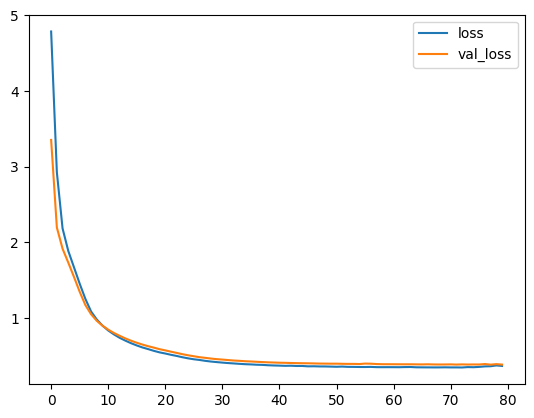

In [28]:
m.compile(loss="mean_squared_error", optimizer="Adam")
hist = m.fit([X_train_A, X_train_B], y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
print(f"MSE: {m.evaluate([X_test_A, X_test_B], y_test):.3f}")
pd.DataFrame(hist.history).plot()

### Example with multiple outputs (and inputs)

In [29]:
input_A = keras.layers.Input(shape=X_train_A.shape[1:], name="inputA")
input_B = keras.layers.Input(shape=X_train_B.shape[1:], name="inputB")
hidden1 = keras.layers.Dense(30, activation='relu', name="hidden1")(input_B)
hidden2 = keras.layers.Dense(30, activation='relu', name="hidden2")(hidden1)
output_aux = keras.layers.Dense(1, name="outputAux")(hidden2)
concat = keras.layers.Concatenate()([input_A, hidden2])
output_main = keras.layers.Dense(1, name="outputMain")(concat)
m = keras.Model(inputs=[input_A, input_B], outputs=[output_main, output_aux])
m.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inputB (InputLayer)            [(None, 3)]          0           []                               
                                                                                                  
 hidden1 (Dense)                (None, 30)           120         ['inputB[0][0]']                 
                                                                                                  
 inputA (InputLayer)            [(None, 5)]          0           []                               
                                                                                                  
 hidden2 (Dense)                (None, 30)           930         ['hidden1[0][0]']                
                                                                                            

65/65 [==============================] - 0s 863us/step - loss: 1.0847 - outputMain_loss: 0.3734 - outputAux_loss: 0.7113
MSE: main: 0.37, aux: 0.711, total: 1.085


<Axes: >

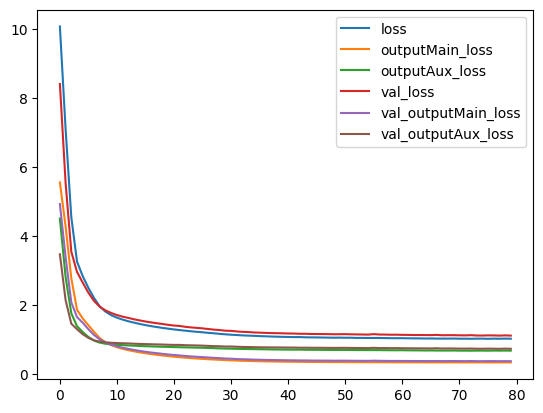

In [30]:
m.compile(loss=["mean_squared_error", "mean_squared_error"], optimizer="Adam")
hist = m.fit([X_train_A, X_train_B], y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
loss_total, loss_main, loss_aux = m.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f"MSE: main: {loss_main:.2f}, aux: {loss_aux:.3f}, total: {loss_total:.3f}")
pd.DataFrame(hist.history).plot()

### Custom model example:

In [31]:
class MyModel(keras.Model):
    def __init__(self, width=20, depth=4, **kwargs):
        super().__init__(**kwargs)
        self.hidden = [
            keras.layers.Dense(width, name=f"hidden_{i}", activation="relu")
            for i in range(depth)
        ]
        self.main_output = keras.layers.Dense(1, name="output_main")
        self.aux_output = keras.layers.Dense(1, name="output_aux")
        
    def call(self, inputs):
        z = keras.layers.concatenate(inputs) # combine input_A and input_B into a single vector
        for i in range(len(self.hidden)):
            z = self.hidden[i](z)
            if i == len(self.hidden) // 2:
                z_aux = self.aux_output(z)
        z_main = self.main_output(z)
        return z_main, z_aux
    
m = MyModel()

65/65 [==============================] - 0s 814us/step - loss: 0.6337 - output_1_loss: 0.3140 - output_2_loss: 0.3197
MSE: main: 0.31, aux: 0.320, total: 0.634


<Axes: >

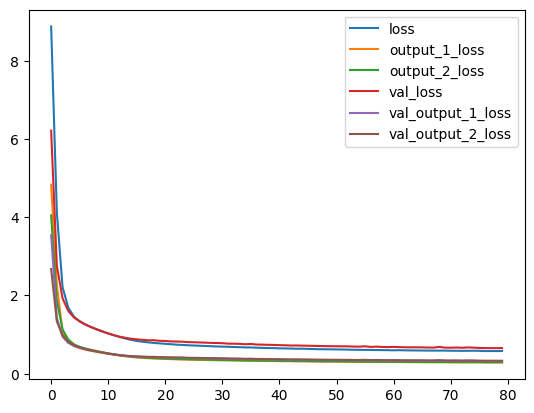

In [32]:
m.compile(loss=["mean_squared_error", "mean_squared_error"], optimizer="Adam")
hist = m.fit([X_train_A, X_train_B], y_train, epochs=80, validation_split=0.1, batch_size=512, verbose=False)
loss_total, loss_main, loss_aux = m.evaluate([X_test_A, X_test_B], [y_test, y_test])
print(f"MSE: main: {loss_main:.2f}, aux: {loss_aux:.3f}, total: {loss_total:.3f}")
pd.DataFrame(hist.history).plot()

In [33]:
m.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden_0 (Dense)            multiple                  180       
                                                                 
 hidden_1 (Dense)            multiple                  420       
                                                                 
 hidden_2 (Dense)            multiple                  420       
                                                                 
 hidden_3 (Dense)            multiple                  420       
                                                                 
 output_main (Dense)         multiple                  21        
                                                                 
 output_aux (Dense)          multiple                  21        
                                                                 
Total params: 1,482
Trainable params: 1,482
Non-trainable 

### Models as custom layers:

65/65 [==============================] - 0s 613us/step - loss: 0.5612
MSE: 0.561


<Axes: >

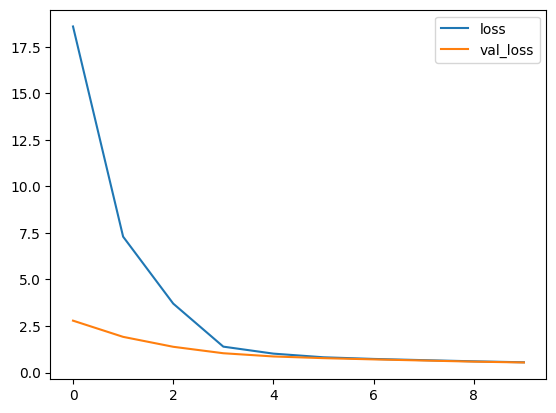

In [34]:
class CubedRelu(keras.Model):
    def __init__(self, units, **kwargs):
        super().__init__(**kwargs)
        self.layer = keras.layers.Dense(units, activation="relu")
        
    def call(self, inputs):
        result = self.layer(inputs)
        return result + 0.001*result**3
    
m = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    CubedRelu(30),
    CubedRelu(30),
    keras.layers.Dense(1),
])
m.compile(loss="mean_squared_error", optimizer="Adam")
hist = m.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=512, verbose=False)
print(f"MSE: {m.evaluate(X_test, y_test):.3f}")
pd.DataFrame(hist.history).plot()